In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [2]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#check the dtypes and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see that the count of all the columns is equal, which means that there are no missing values in the dataset. 

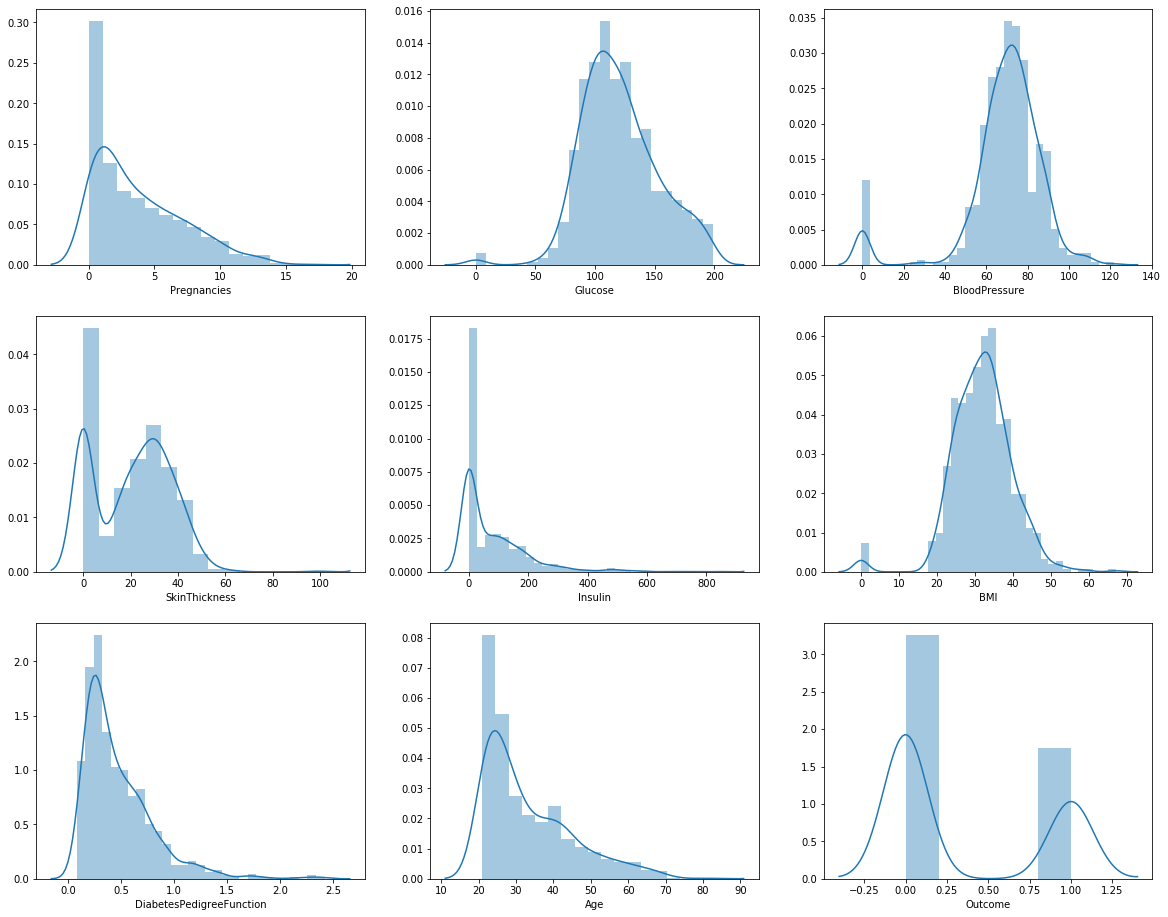

In [15]:
plt.figure(figsize=(20,16), facecolor="w")
plotnumber=1

for col in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col)
    plotnumber+=1
plt.show()

We noticed that there are Zero values for Insulin, BMI, BloodPressure, Glucose, SkinThickness which is not possible. Hence we need to replace them with the mean of their respective columns.

In [17]:
data["Glucose"]=data["Glucose"].replace(0,data["Glucose"].mean())
data["Insulin"]=data["Insulin"].replace(0,data["Insulin"].mean())
data["BMI"]=data["BMI"].replace(0,data["BMI"].mean())
data["BloodPressure"]=data["BloodPressure"].replace(0,data["BloodPressure"].mean())
data["SkinThickness"]=data["SkinThickness"].replace(0,data["SkinThickness"].mean())

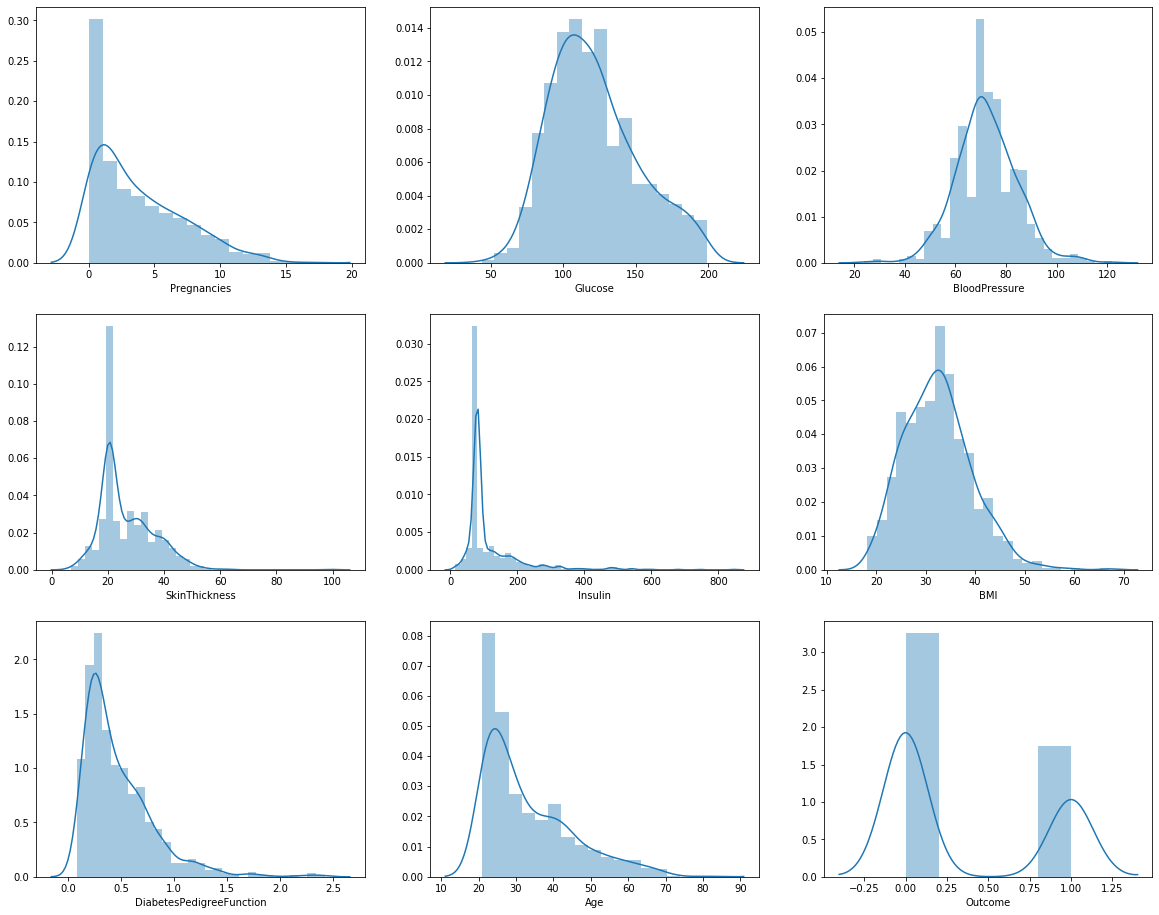

In [18]:
plt.figure(figsize=(20,16), facecolor="w")
plotnumber=1

for col in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col)
    plotnumber+=1
plt.show()

Now lets check for the outliers using box plots

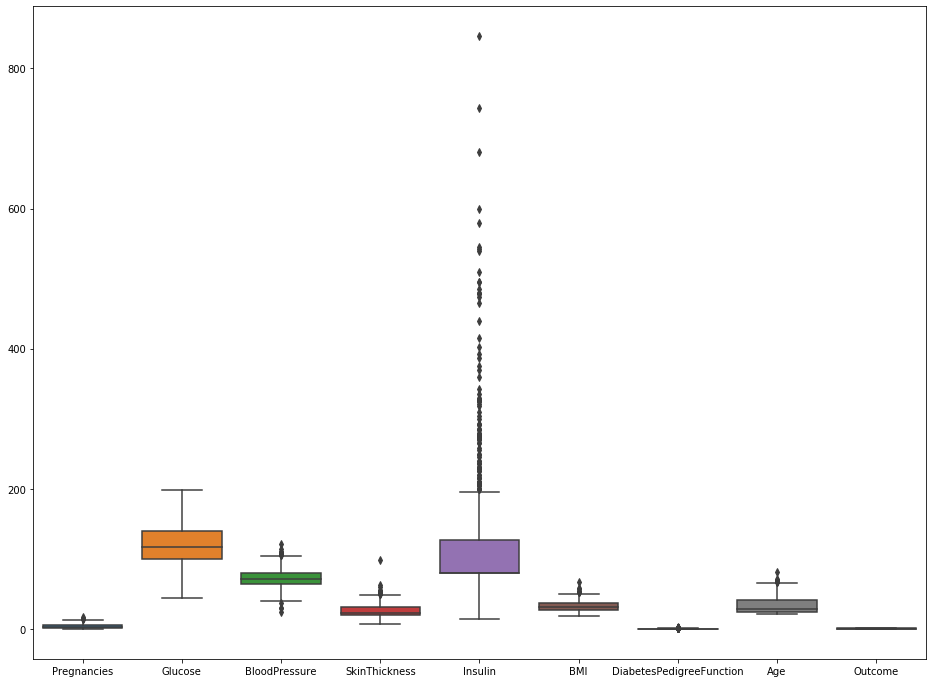

In [22]:
fig, ax=plt.subplots(figsize=(16,12))
sns.boxplot(data=data, ax= ax)

According to basic obervation, we will select a quantile of the data to remove the outliers

In [23]:
q=data["Pregnancies"].quantile(0.98)
data_cleaned=data[data["Pregnancies"]<q]
q=data["BMI"].quantile(0.99)
data_cleaned=data[data["BMI"]<q]
q=data["SkinThickness"].quantile(0.99)
data_cleaned=data[data["SkinThickness"]<q]
q=data["Insulin"].quantile(0.95)
data_cleaned=data[data["Insulin"]<q]
q=data["DiabetesPedigreeFunction"].quantile(0.99)
data_cleaned=data[data["DiabetesPedigreeFunction"]<q]
q=data["Age"].quantile(0.99)
data_cleaned=data[data["Age"]<q]

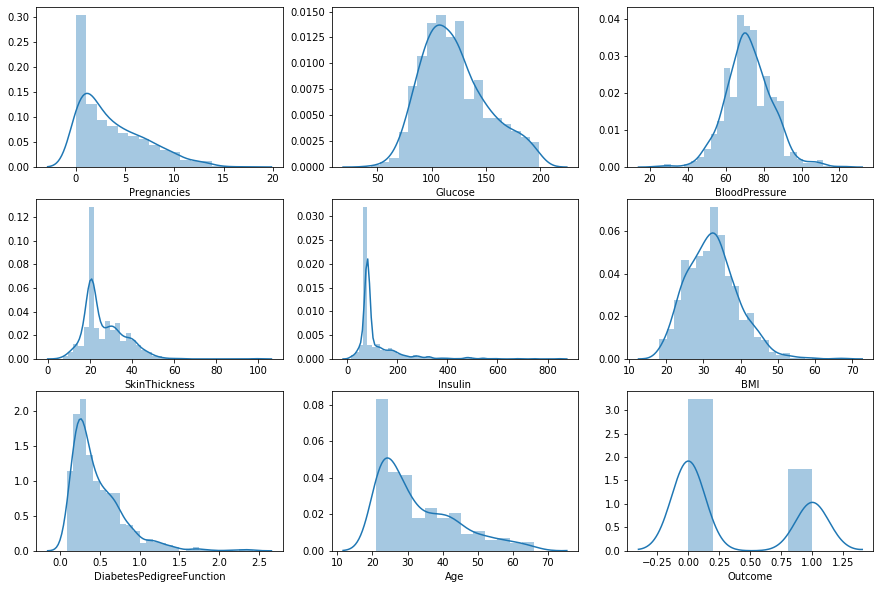

In [26]:
plt.figure(figsize=(15,10))
plotnumber=1
for col in data_cleaned:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[col])
        plt.xlabel(col)
    plotnumber+=1
plt.show()

In [27]:
data_cleaned.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [28]:
x=data_cleaned.drop(columns="Outcome")
y=data_cleaned["Outcome"]

Now lets scale the data and then check for the multicollinearity

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [31]:
x_scaled

array([[ 0.64327075,  0.87008298, -0.01698412, ...,  0.16090077,
         0.46879263,  1.54828125],
       [-0.83984741, -1.20656984, -0.51093456, ..., -0.85816238,
        -0.36177415, -0.16252742],
       [ 1.23651801,  2.02377899, -0.6755847 , ..., -1.33857787,
         0.60421113, -0.07248486],
       ...,
       [ 0.34664712, -0.01991109, -0.01698412, ..., -0.91639456,
        -0.68075995, -0.25256998],
       [-0.83984741,  0.14490263, -1.00488499, ..., -0.3486308 ,
        -0.36779275,  1.27815356],
       [-0.83984741, -0.9428679 , -0.18163427, ..., -0.30495667,
        -0.47010895, -0.88286791]])

Now lets check for multicllinearity using variance inflation factor(VIF)

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vif=pd.DataFrame()
vif["Features"]=x.columns
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,Features,vif
0,Pregnancies,1.484572
1,Glucose,1.354580
2,BloodPressure,1.247898
3,SkinThickness,1.455095
4,Insulin,1.264776
5,BMI,1.551161
6,DiabetesPedigreeFunction,1.058847
7,Age,1.680199


All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y, test_size=0.25, random_state=35)

In [37]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(569, 8)
(190, 8)
(569,)
(190,)


In [39]:
Log_reg=LogisticRegression()
Log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
import pickle
with open("LogisticRegmodel.sav","wb") as f:
    pickle.dump(Log_reg,f)
    
with open("Scaler.sav","wb") as f:
    pickle.dump(scaler,f)

Lets see how our model predicts

In [42]:
y_pred=Log_reg.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [44]:
#To check the accuracy of the model
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7631578947368421

In [45]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[108,  17],
       [ 28,  37]], dtype=int64)

Here a person diagnosed as FalseNegative is a disaster. Hence we need to reduce the FN factor here.

In [46]:
#recall uses FN
recall=conf_mat[0][0]/(conf_mat[0][0] + conf_mat[1][0])
recall

0.7941176470588235